In [227]:
import pandas as pd

df = pd.read_csv('GlobalEconomyIndicators.csv')

In [228]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [229]:
# 1. Data Cleaning

In [230]:
# 1.1 missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CountryID                                                                                       0
Country                                                                                         0
Year                                                                                            0
AMA exchange rate                                                                               0
IMF based exchange rate                                                                         0
Population                                                                                      0
Currency                                                                                        0
Per capita GNI                                                                                  0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
Changes in inventories                                                                

In [231]:
# Fill missing values with the mean (for numerical columns)
df[' Changes in inventories '] = df[' Changes in inventories '].fillna(df[' Changes in inventories '].mean())
print("\n Missing values in 'Changes in inventories' column after filling with mean:" , df[' Changes in inventories '].isnull().sum())
# only for this column beacuse way too many missing values
# mean becoz its continuous

# remove the rows with missing values - less missing values for features
df.dropna()
print("\n Missing values in each column after handling them:")
print(df.isnull().sum())



 Missing values in 'Changes in inventories' column after filling with mean: 0

 Missing values in each column after handling them:
CountryID                                                                                      0
Country                                                                                        0
Year                                                                                           0
AMA exchange rate                                                                              0
IMF based exchange rate                                                                        0
Population                                                                                     0
Currency                                                                                       0
Per capita GNI                                                                                 0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          

In [232]:
# 1.2 Duplicates 

duplicate_rows = df[df.duplicated()]
print("Number of Duplicate Rows = " , duplicate_rows.shape)

df = df.drop_duplicates()
print("Size of the Dataset after removing the duplicates = " , df.shape)

# The dataset has no duplicates

Number of Duplicate Rows =  (0, 26)
Size of the Dataset after removing the duplicates =  (10512, 26)


In [233]:
# 2. Normalisation 

exclude_columns = [' CountryID ',' Country ',' Currency '] #caltegorical columns
column = df.drop(columns=exclude_columns).columns.tolist() #numerical columns
print(col)

range_of_columns = df[column].max() - df[column].min()
print(range_of_columns)


 Currency 
Year                                                                                         5.100000e+01
AMA exchange rate                                                                            1.116366e+05
IMF based exchange rate                                                                      4.200000e+04
Population                                                                                   1.425889e+09
Per capita GNI                                                                               2.342830e+05
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           1.350000e+12
Changes in inventories                                                                       3.620000e+11
Construction (ISIC F)                                                                        1.240000e+12
Exports of goods and services                                                                3.531670e+12
Final consumption expenditure      

In [234]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_normalize = column[1:]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

range_of_columns = df[column].max() - df[column].min()
print(range_of_columns)


Year                                                                                         51.000000
AMA exchange rate                                                                            48.727940
IMF based exchange rate                                                                      21.629805
Population                                                                                   12.494190
Per capita GNI                                                                               13.725326
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           33.464260
Changes in inventories                                                                       44.624753
Construction (ISIC F)                                                                        24.872828
Exports of goods and services                                                                20.195126
Final consumption expenditure                                            

In [235]:
# 3. Hamdling Categorical values
# Label Encoding

from sklearn.preprocessing import LabelEncoder

columns_to_encode = [' CountryID ',' Country ',' Currency ']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col])

0          0
1          0
2          0
3          0
4          0
        ... 
10507    219
10508    219
10509    219
10510    219
10511    219
Name:  CountryID , Length: 10512, dtype: int64
0          0
1          0
2          0
3          0
4          0
        ... 
10507    217
10508    217
10509    217
10510    217
10511    217
Name:  Country , Length: 10512, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
10507    70
10508    70
10509    70
10510    70
10511    70
Name:  Currency , Length: 10512, dtype: int64


In [236]:
# 4. Feature Engineering

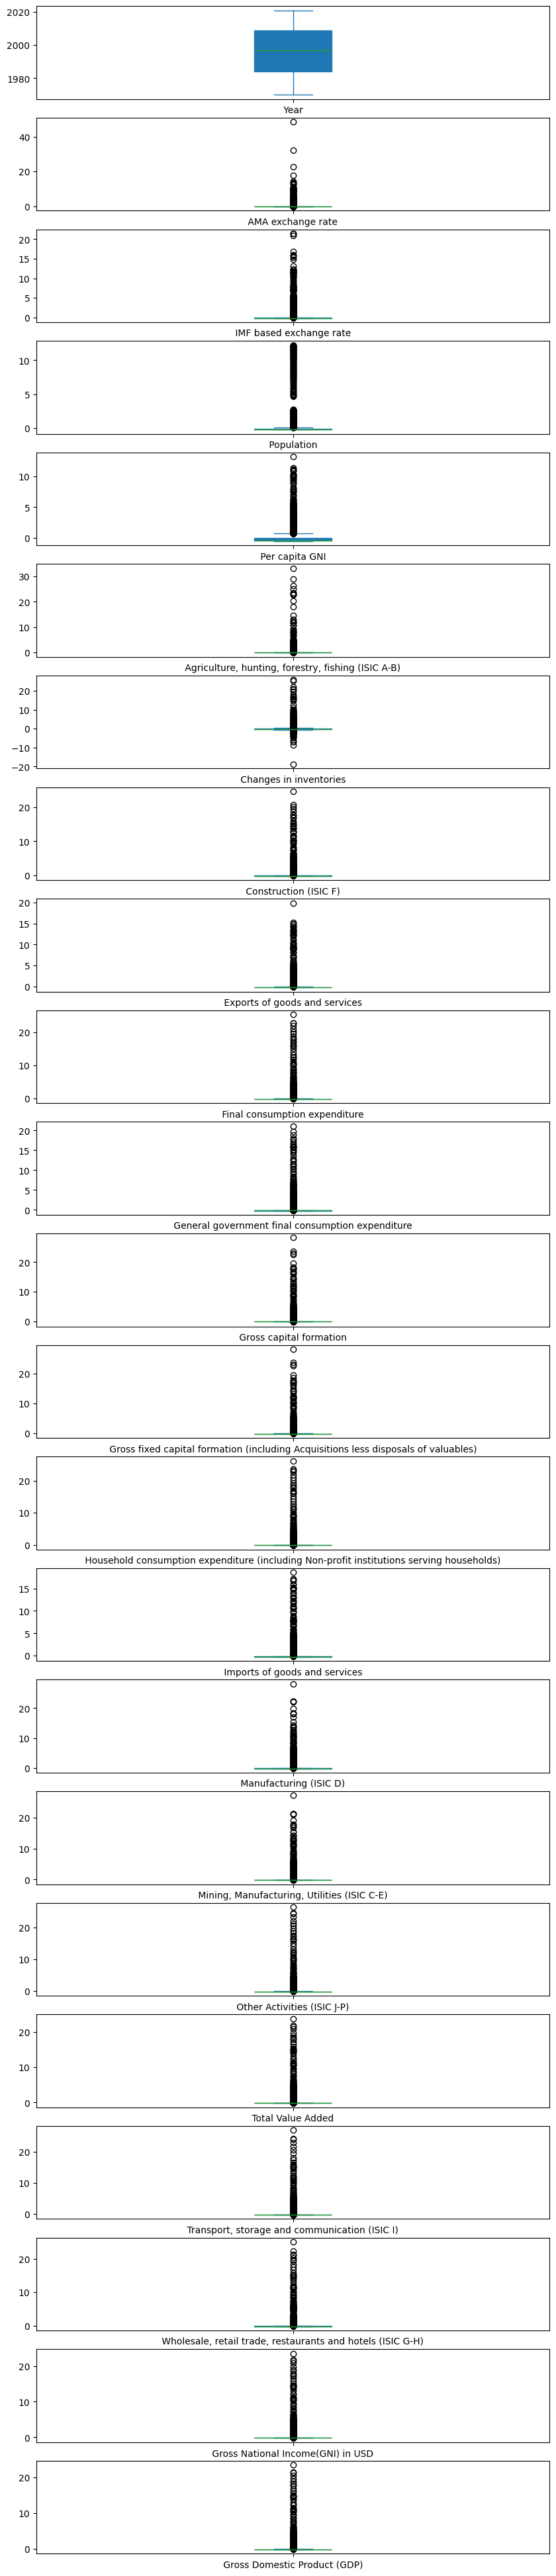

(10512, 26)
Column:  Year 
Lower Bound: 1946.5, Upper Bound: 2046.5
Number of lower outliers: 0
Number of upper outliers: 0

Column:  AMA exchange rate 
Lower Bound: -0.18852337282591658, Upper Bound: -0.10062682260943201
Number of lower outliers: 0
Number of upper outliers: 1916

Column:  IMF based exchange rate 
Lower Bound: -0.21196431014688188, Upper Bound: -0.11500748825343876
Number of lower outliers: 0
Number of upper outliers: 1946

Column:  Population 
Lower Bound: -0.45665611295000086, Upper Bound: 0.10958877688856455
Number of lower outliers: 0
Number of upper outliers: 1350

Column:  Per capita GNI 
Lower Bound: -1.2062050749277657, Upper Bound: 0.7237404241001171
Number of lower outliers: 0
Number of upper outliers: 1340

Column:  Agriculture, hunting, forestry, fishing (ISIC A-B) 
Lower Bound: -0.3346939332225747, Upper Bound: 0.05129760193180735
Number of lower outliers: 0
Number of upper outliers: 1415

Column:  Changes in inventories 
Lower Bound: -0.5000653766322178, 

C:\Users\katip\AppData\Local\Temp\ipykernel_23176\3970685293.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1946.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_lower, col] = lower_bound


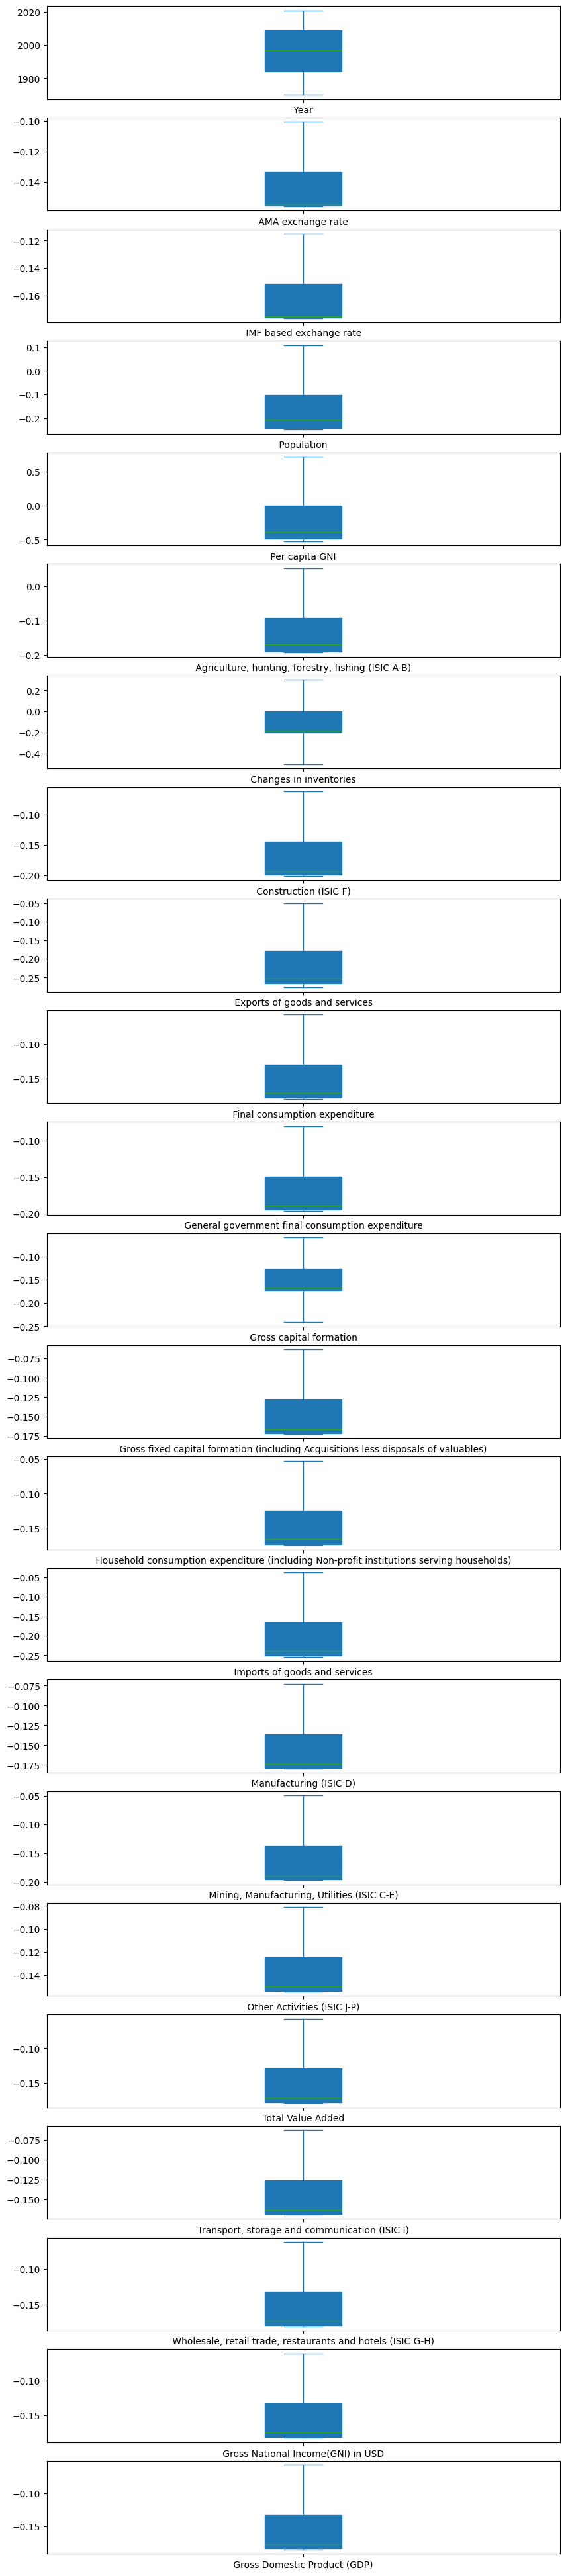

(10512, 26)


In [237]:
# 5. 6. Exploratory Data Analysis (EDA) and Outliers

#Plotting box plots for each numeric column
df[numeric_cols].plot(kind='box', subplots=True, layout=(len(column), 1), figsize=(10, 50), patch_artist=True)
plt.show()
print(df.shape)

for col in column:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_lower = df[col] < lower_bound
        outliers_upper = df[col] > upper_bound

        # Transform outliers by capping them at the bounds
        df.loc[outliers_lower, col] = lower_bound
        df.loc[outliers_upper, col] = upper_bound

        print(f"Column: {col}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of lower outliers: {outliers_lower.sum()}")
        print(f"Number of upper outliers: {outliers_upper.sum()}\n")


#Plotting box plots for each numeric column
df[numeric_cols].plot(kind='box', subplots=True, layout=(len(column), 1), figsize=(10, 50), patch_artist=True)
plt.show()
print(df.shape)



Distribution of numerical columns:


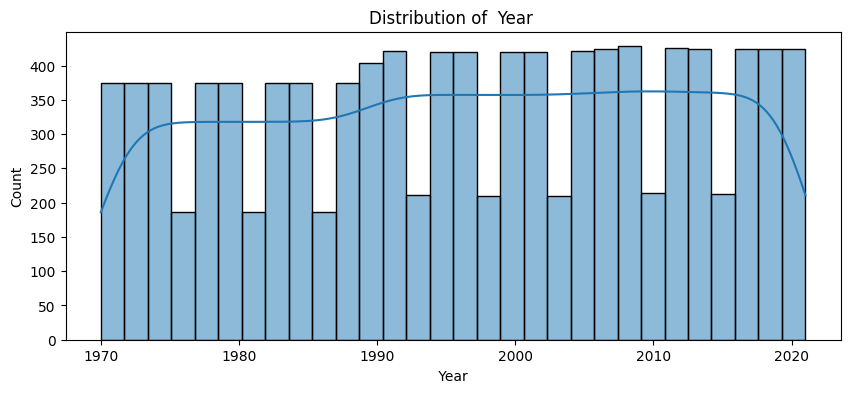

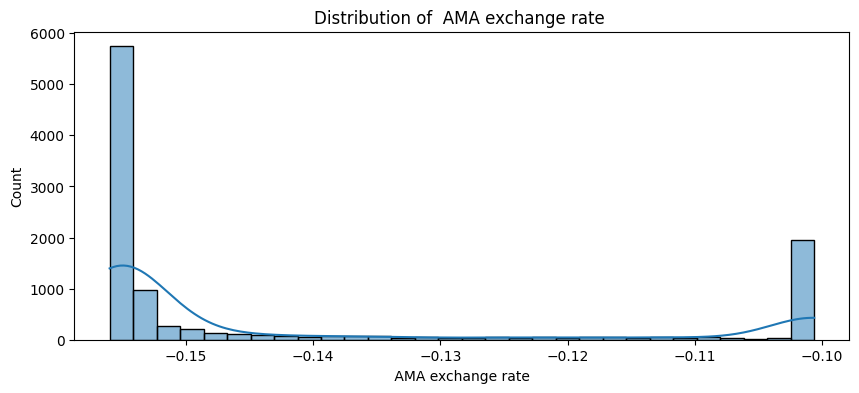

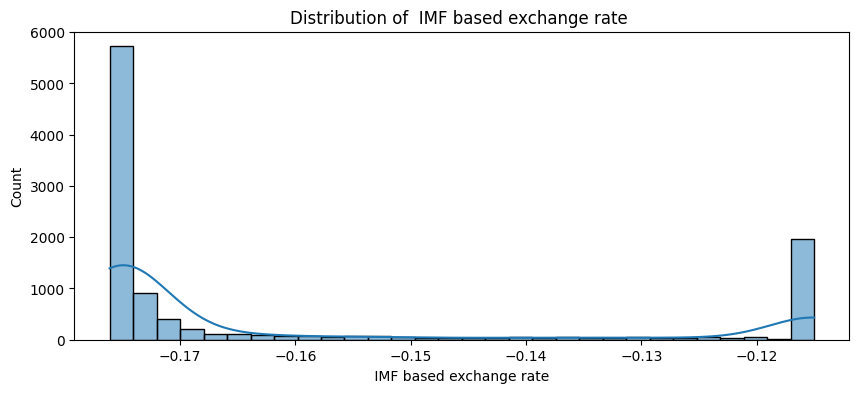

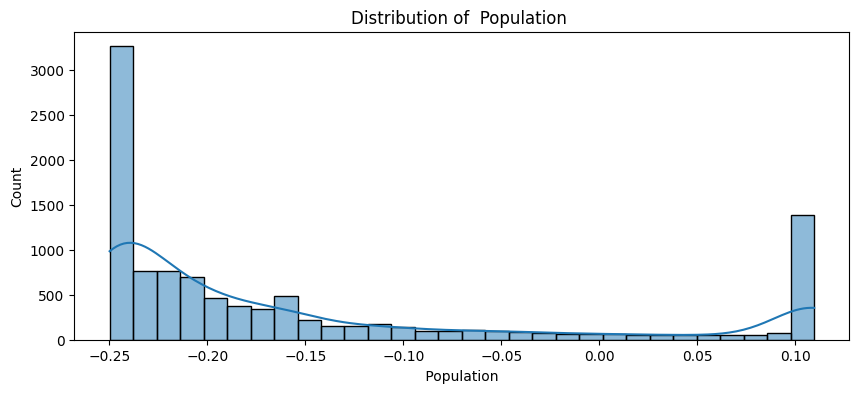

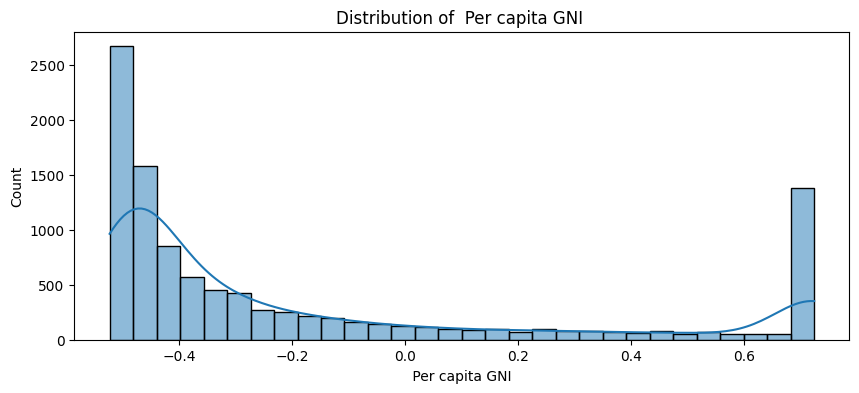

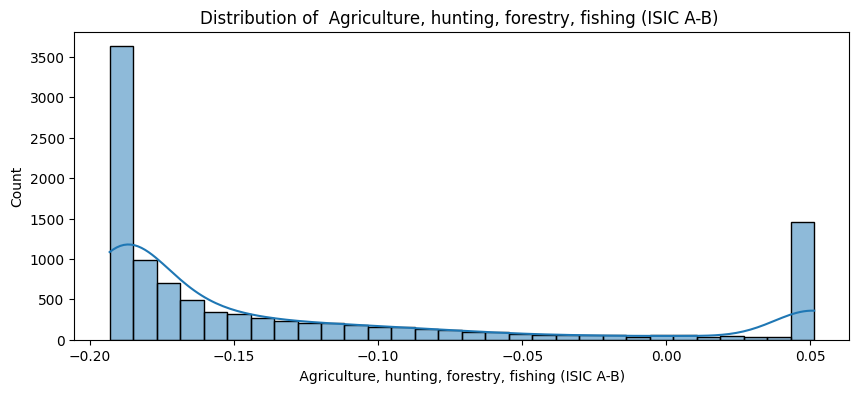

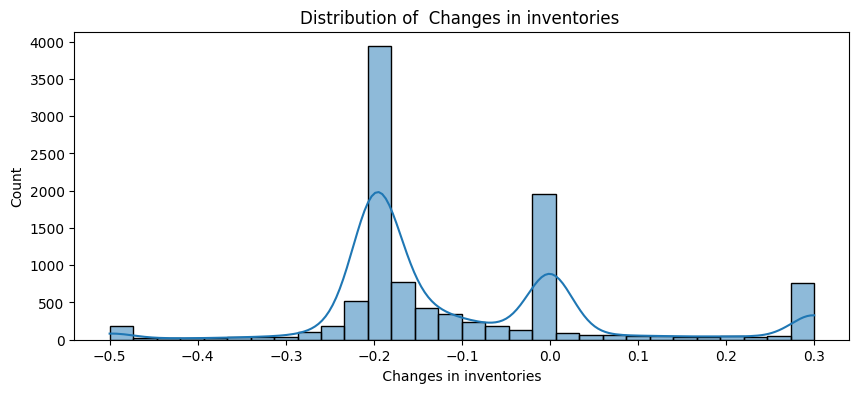

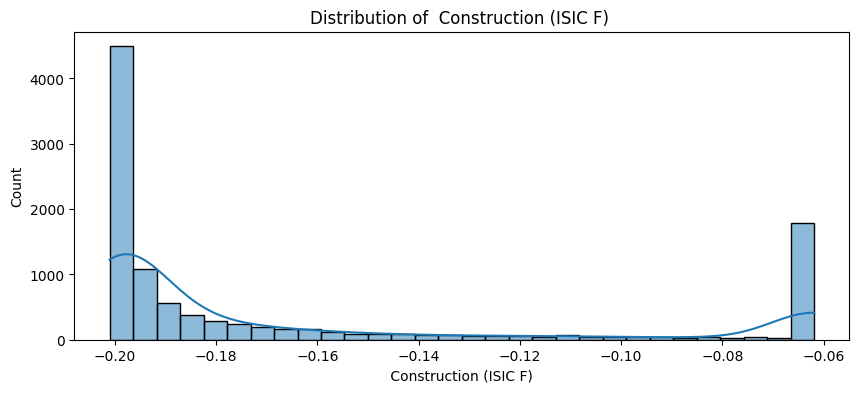

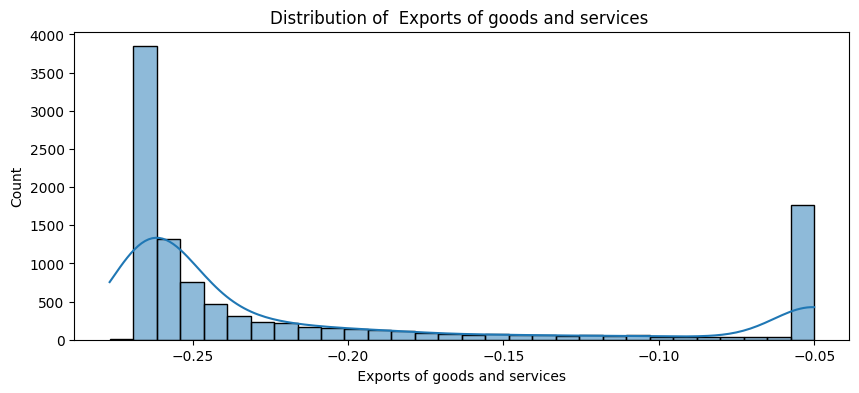

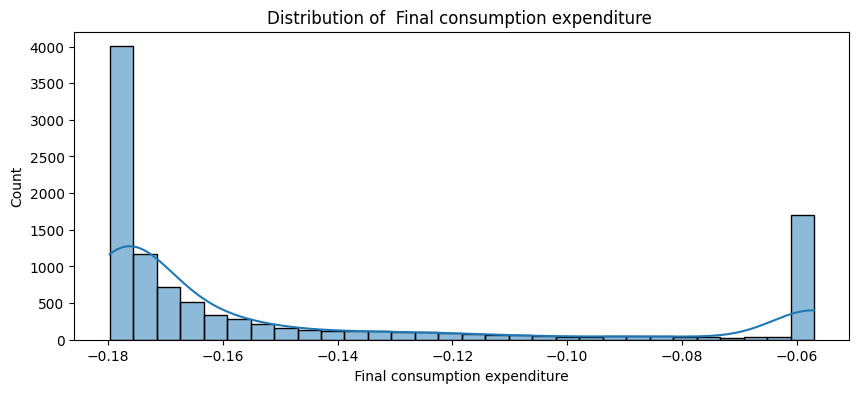

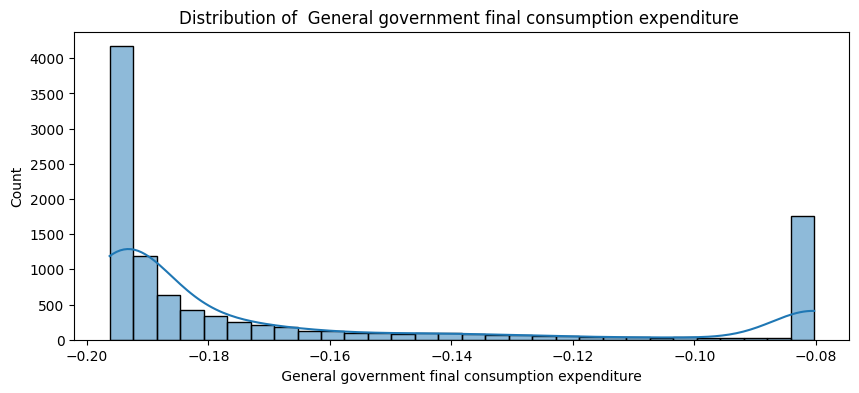

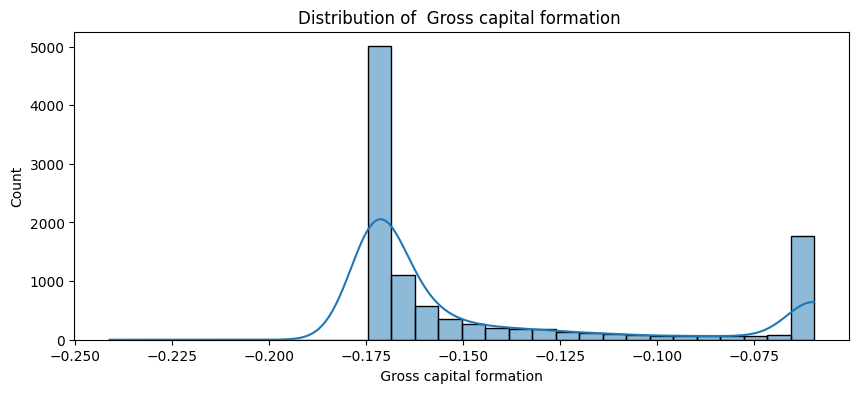

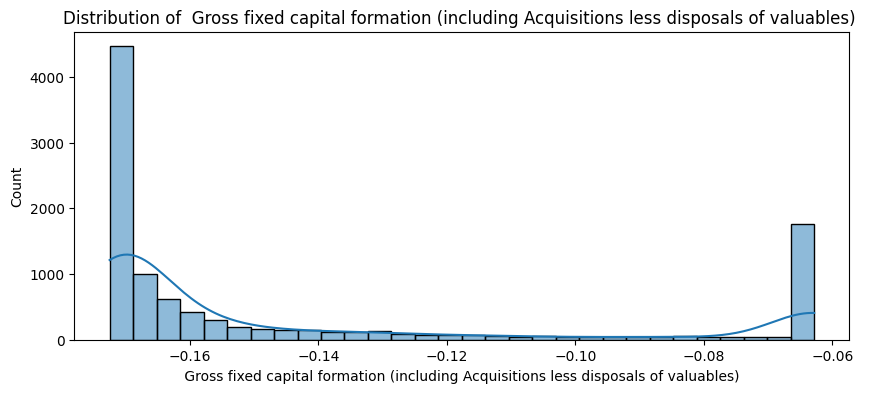

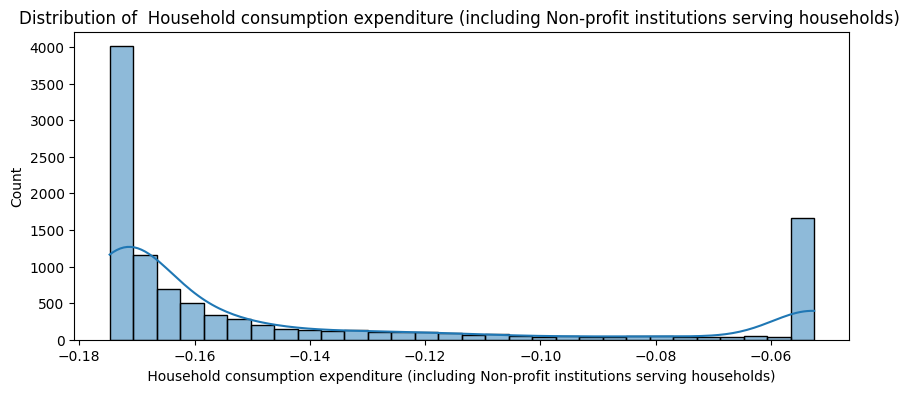

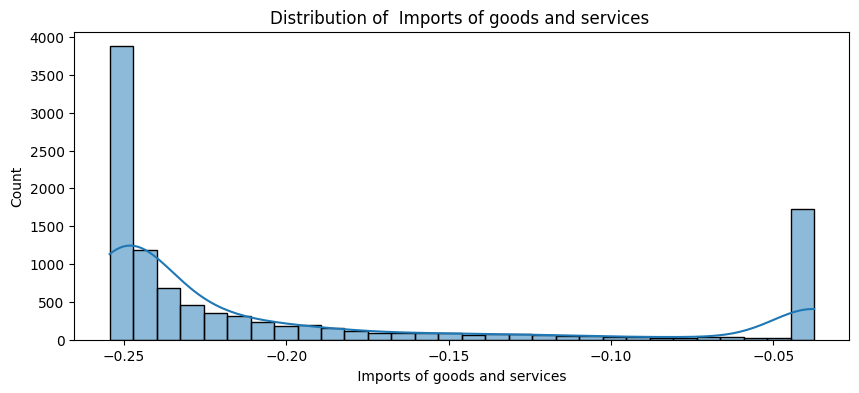

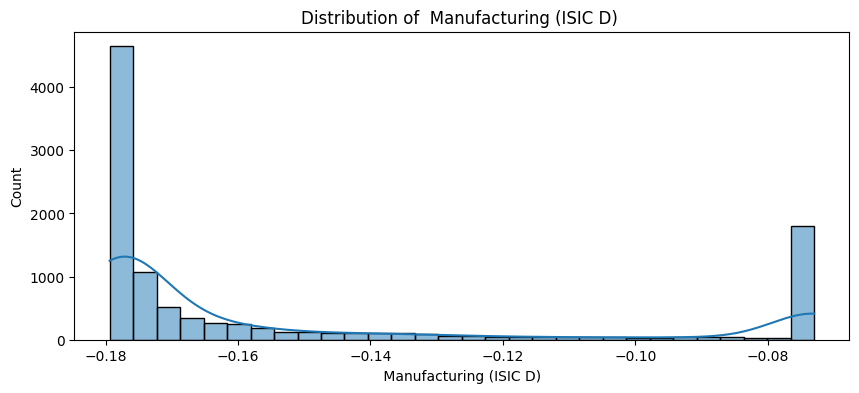

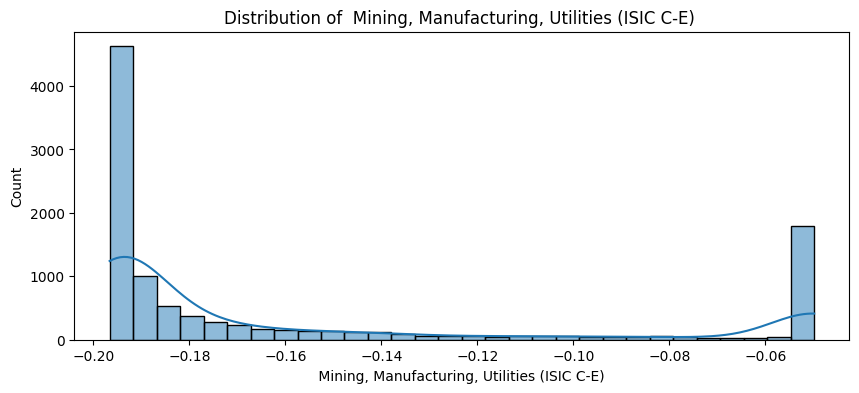

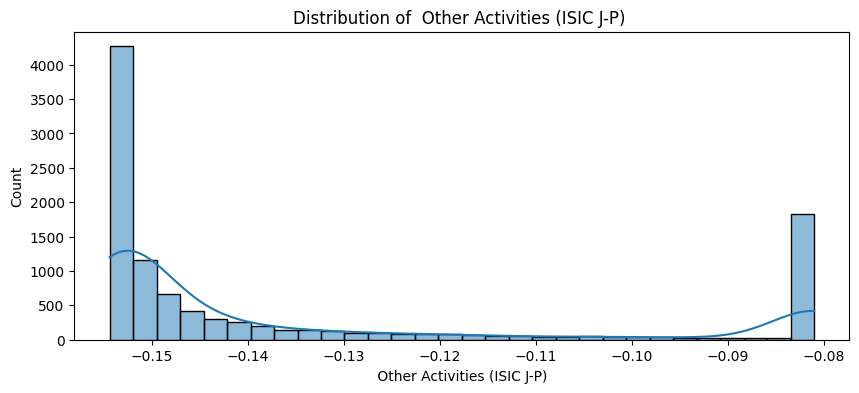

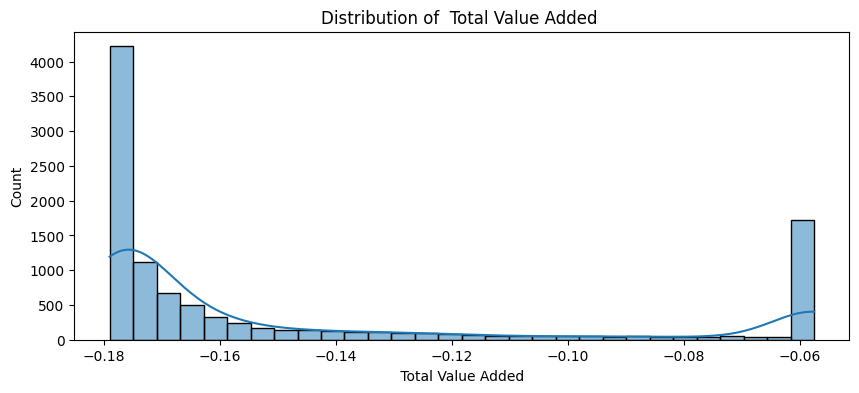

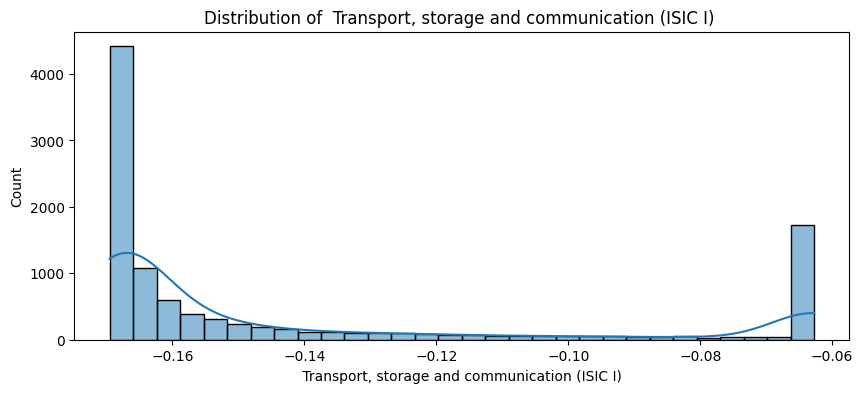

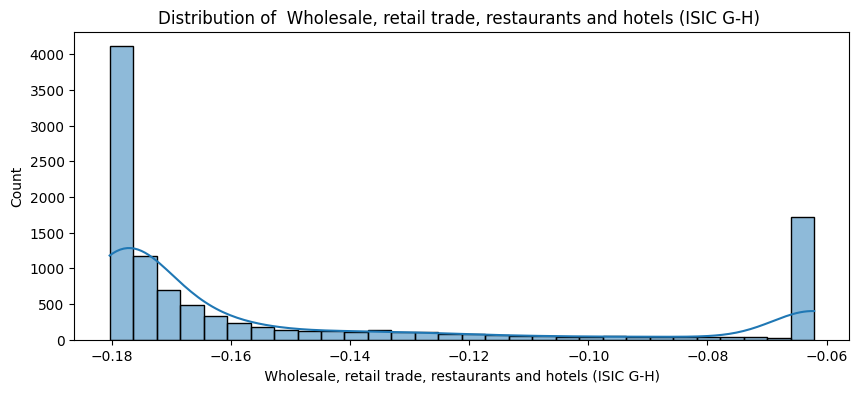

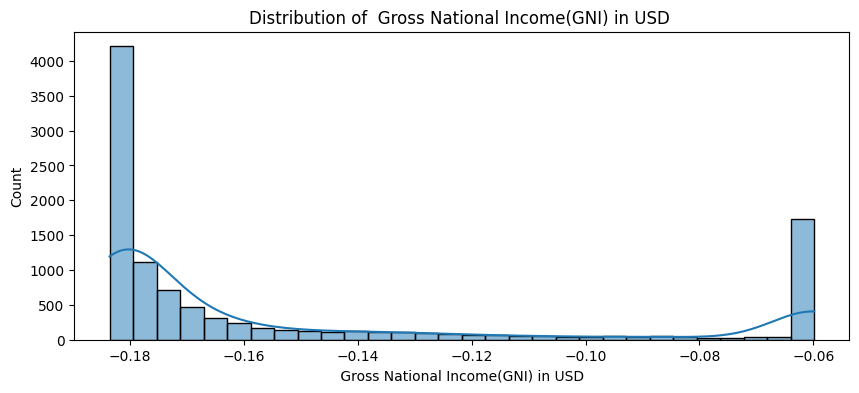

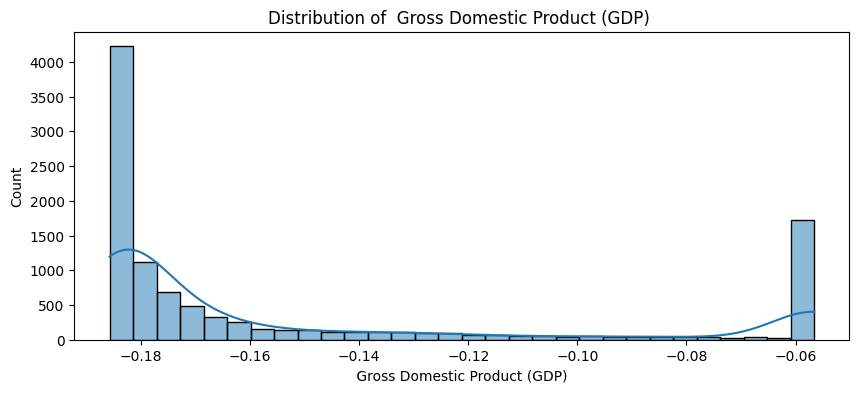

In [276]:
# 7. Data Visualization

# Distribution of numerical columns

print("\nDistribution of numerical columns:")
for col in column:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



 Distribution of categorical columns:


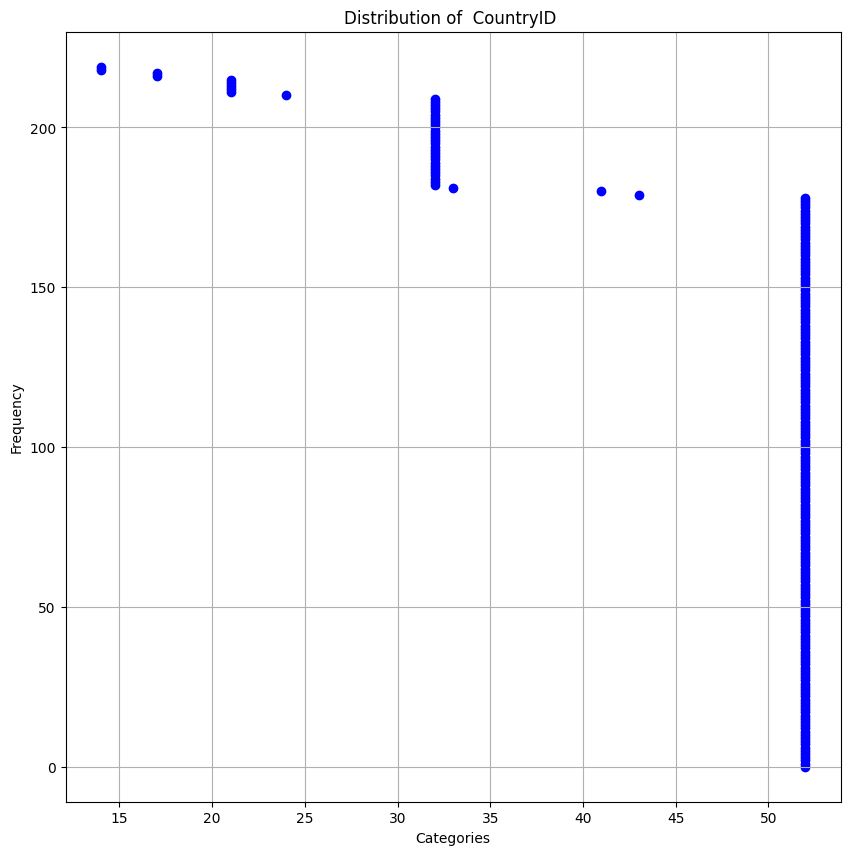

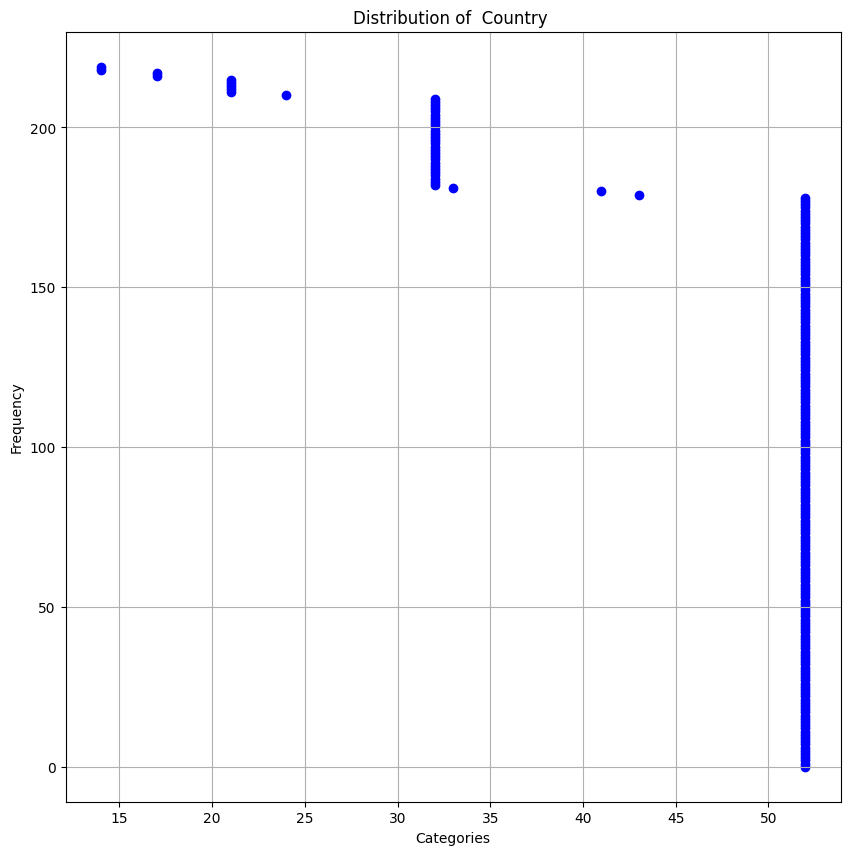

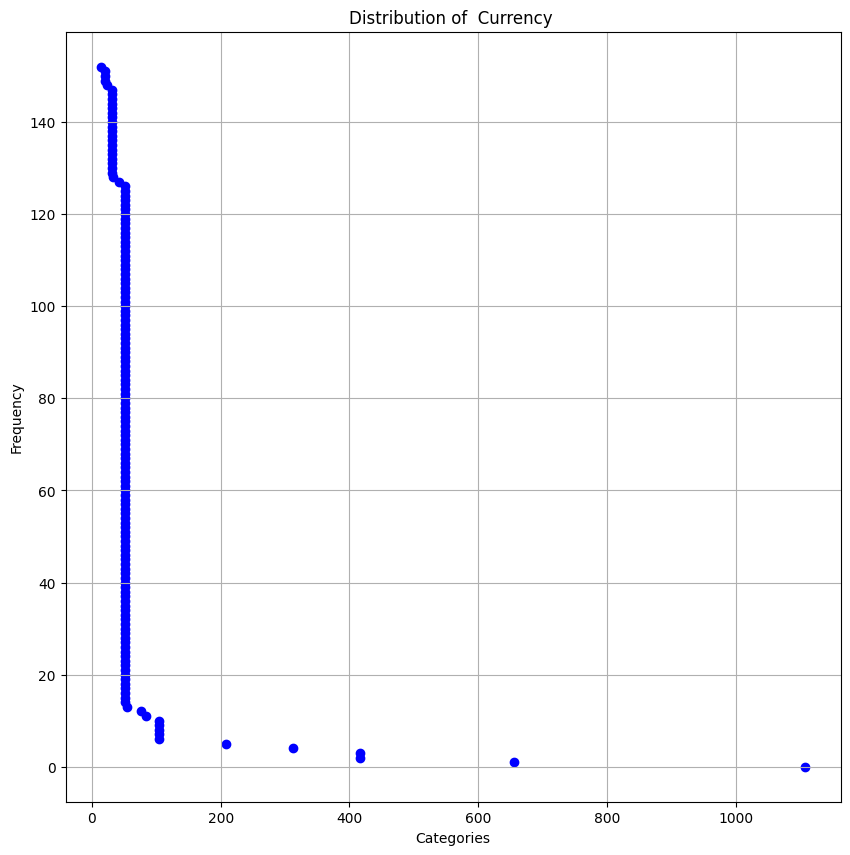

In [282]:
# Distribution of categorical columns

print("\n Distribution of categorical columns:")
for col in exclude_columns:
    
    """ plt.figure(figsize=(30,30))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show() """
    
    plt.figure(figsize=(10,10))
    vc = df[col].value_counts()
    y = list(range(0,  len(vc)))
    plt.scatter(vc, y, marker='o', linestyle='-', color='b')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Categories') #from label encoding, we get the categories from 0 to 1
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



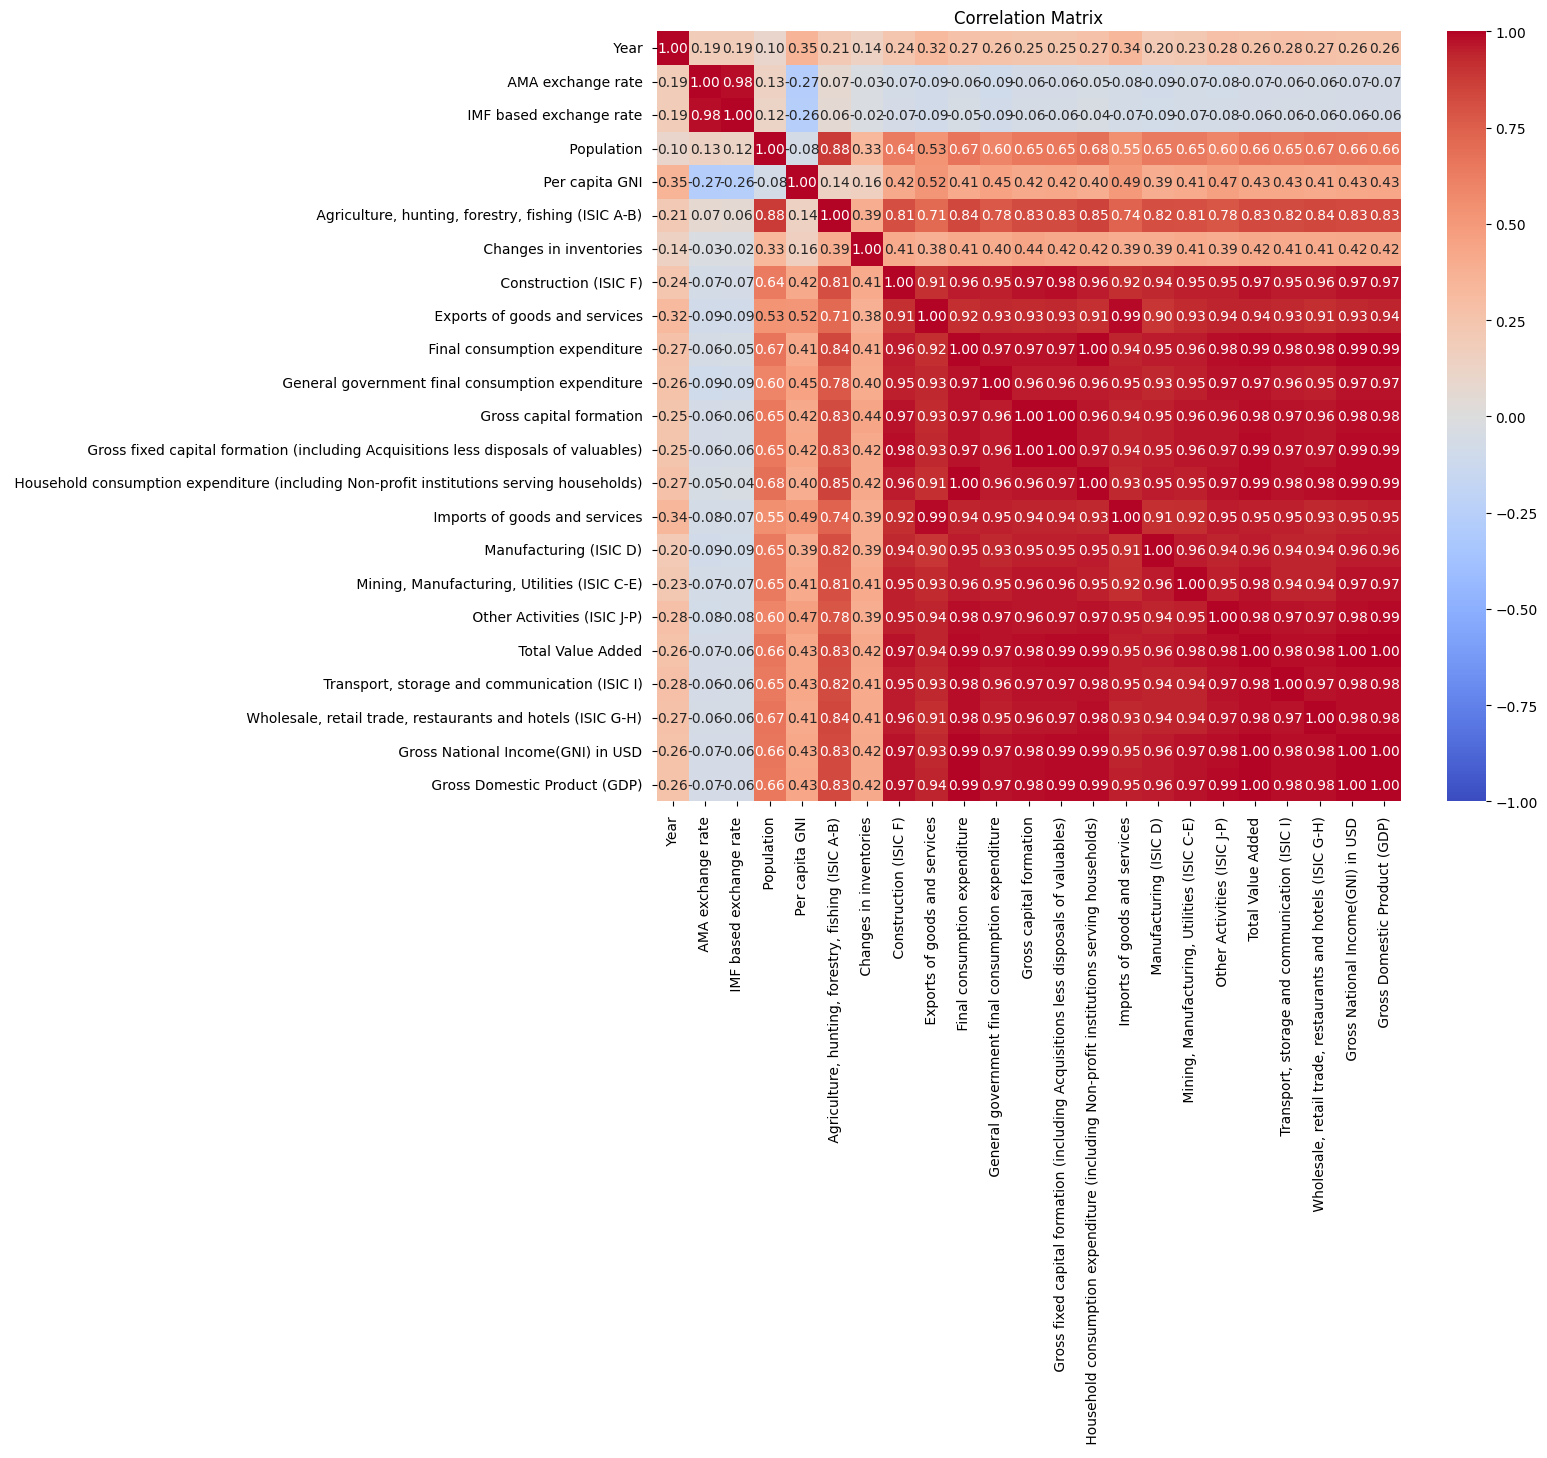

In [286]:
# 8. Correlation Analysis

corr_matrix = df[column].corr()
plt.figure(figsize=(12,10))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()